# TensorFlow 101

### 1. Basic syntax
### 2. TensorFlow Graphs
### 3. tf.Variable
### 4. tf.Placeholder
### 5. TensorFlow Neural Network
### 6. TensorFlow Regression and Classification
### 7. Estimator API
### 8. Save and Restore Model

## Classification

## Data

https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patient shows signs of diabetes according to World Health Organization
       criteria (i.e., if the 2 hour post-load plasma glucose was at least 
       200 mg/dl at any survey  examination or if found during routine medical
       care).   The population lives near Phoenix, Arizona, USA.

       Results: Their ADAP algorithm makes a real-valued prediction between
       0 and 1.  This was transformed into a binary decision using a cutoff of 
       0.448.  Using 576 training instances, the sensitivity and specificity
       of their algorithm was 76% on the remaining 192 instances.

4. Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

5. Number of Instances: 768

6. Number of Attributes: 8 plus class 

    7. For Each Attribute: (all numeric-valued)
       1. Number of times pregnant
       2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
       3. Diastolic blood pressure (mm Hg)
       4. Triceps skin fold thickness (mm)
       5. 2-Hour serum insulin (mu U/ml)
       6. Body mass index (weight in kg/(height in m)^2)
       7. Diabetes pedigree function
       8. Age (years)
       9. Class variable (0 or 1)

8. Missing Attribute Values: Yes

9. Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   0            500
   1            268

10. Brief statistical analysis:

        Attribute number:    Mean:   Standard Deviation:
        1.                     3.8     3.4
        2.                   120.9    32.0
        3.                    69.1    19.4
        4.                    20.5    16.0
        5.                    79.8   115.2
        6.                    32.0     7.9
        7.                     0.5     0.3
        8.                    33.2    11.8

In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

### Clean the Data

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


### Feature Columns

In [8]:
diabetes.columns 

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [9]:
import tensorflow as tf

### Continuous Features

* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function

In [10]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

### Categorical Features

In [11]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])
# Alternative
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

### Converting Continuous to Categorical

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

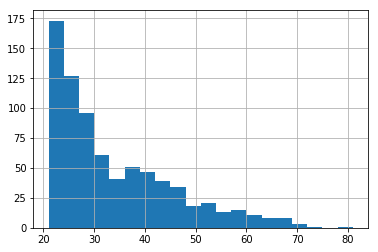

In [13]:
diabetes['Age'].hist(bins=20)

In [14]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [15]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

### Train Test Split

In [16]:
x_data = diabetes.drop('Class',axis=1)

In [17]:
labels = diabetes['Class']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

### Input Function

In [23]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

### Creating the Model

In [24]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_device_fn': None, '_num_worker_replicas': 1, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11c6dfc50>, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': None, '_global_id_in_cluster': 0, '_task_id': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_is_chief': True, '_save_checkpoints_steps': None, '_num_ps_replicas': 0, '_model_dir': '/var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmp4psicexp', '_service': None, '_log_step_count_steps': 100, '_evaluation_master': '', '_save_checkpoints_secs': 600, '_master': '', '_train_distribute': None, '_task_type': 'worker'}


In [25]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmp4psicexp/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 297.834
INFO:tensorflow:loss = 4.9512367, step = 101 (0.336 sec)
INFO:tensorflow:global_step/sec: 519.548
INFO:tensorflow:loss = 5.2257075, step = 201 (0.193 sec)
INFO:tensorflow:global_step/sec: 494.506
INFO:tensorflow:loss = 5.96923, step = 301 (0.202 sec)
INFO:tensorflow:global_step/sec: 529.07
INFO:tensorflow:loss = 7.2234125, step = 401 (0.189 sec)
INFO:tensorflow:global_step/sec: 565.49
INFO:tensorflow:loss = 4.91765, step = 501 (0.179 sec)
INFO:tensorflow:global_step/sec: 514.713
INFO:tensorflow:loss = 4.9485154, step = 601 (0.192 sec)
INFO:tensorflow:glob

## Evaluation

In [26]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [27]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-14-02:33:28
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmp4psicexp/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-09-14-02:33:29
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.71653545, accuracy_baseline = 0.65748036, auc = 0.78408694, auc_precision_recall = 0.6247422, average_loss = 0.53603506, global_step = 1000, label/mean = 0.34251967, loss = 5.2366505, precision = 0.5882353, prediction/mean = 0.38202113, recall = 0.57471263
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmp4psicexp/model.ckpt-1000


In [28]:
results

{'accuracy': 0.71653545,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78408694,
 'auc_precision_recall': 0.6247422,
 'average_loss': 0.53603506,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.2366505,
 'precision': 0.5882353,
 'prediction/mean': 0.38202113,
 'recall': 0.57471263}

## Predictions

In [29]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [30]:
# Predictions is a generator! 
predictions = model.predict(pred_input_func)

In [31]:
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmp4psicexp/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5335023], dtype=float32),
  'logits': array([0.13421023], dtype=float32),
  'probabilities': array([0.46649772, 0.5335023 ], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6457357], dtype=float32),
  'logits': array([0.6003469], dtype=float32),
  'probabilities': array([0.35426435, 0.6457357 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.4242937], dtype=float32),
  'logits': array([-0.3051718], dtype=float32),
  'probabilities': array([0.5757063, 0.4242937], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.30853453], dtype=float32),
  'logits': array([-0.80697936], dtype=float32),
  'probabilities': array([0.69146544, 0.30853453], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=objec

# DNN Classifier

In [32]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_device_fn': None, '_num_worker_replicas': 1, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11cf19fd0>, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': None, '_global_id_in_cluster': 0, '_task_id': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_is_chief': True, '_save_checkpoints_steps': None, '_num_ps_replicas': 0, '_model_dir': '/var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmp24t1612p', '_service': None, '_log_step_count_steps': 100, '_evaluation_master': '', '_save_checkpoints_secs': 600, '_master': '', '_train_distribute': None, '_task_type': 'worker'}


In [36]:
dnn_model.train(input_fn=input_func,steps=1000) # Error

INFO:tensorflow:Calling model_fn.


ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [37]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [38]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_column, age_buckets]

In [39]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [40]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_device_fn': None, '_num_worker_replicas': 1, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11d0f8dd8>, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': None, '_global_id_in_cluster': 0, '_task_id': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_is_chief': True, '_save_checkpoints_steps': None, '_num_ps_replicas': 0, '_model_dir': '/var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmprahaatuz', '_service': None, '_log_step_count_steps': 100, '_evaluation_master': '', '_save_checkpoints_secs': 600, '_master': '', '_train_distribute': None, '_task_type': 'worker'}


In [41]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmprahaatuz/model.ckpt.
INFO:tensorflow:loss = 7.2313795, step = 1
INFO:tensorflow:global_step/sec: 322.818
INFO:tensorflow:loss = 4.3154297, step = 101 (0.310 sec)
INFO:tensorflow:global_step/sec: 531.864
INFO:tensorflow:loss = 6.473831, step = 201 (0.187 sec)
INFO:tensorflow:global_step/sec: 504.686
INFO:tensorflow:loss = 3.2103405, step = 301 (0.198 sec)
INFO:tensorflow:global_step/sec: 543.907
INFO:tensorflow:loss = 4.313659, step = 401 (0.184 sec)
INFO:tensorflow:global_step/sec: 501.082
INFO:tensorflow:loss = 4.0369, step = 501 (0.200 sec)
INFO:tensorflow:global_step/sec: 513.796
INFO:tensorflow:loss = 3.4489193, step = 601 (0.195 sec)
INFO:tensorflow:gl

In [42]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [43]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-14-02:34:01
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmprahaatuz/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-09-14-02:34:02
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7322835, accuracy_baseline = 0.65748036, auc = 0.8185353, auc_precision_recall = 0.7312533, average_loss = 0.5058263, global_step = 1000, label/mean = 0.34251967, loss = 4.9415336, precision = 0.5959596, prediction/mean = 0.3990603, recall = 0.6781609
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmprahaatuz/model.ckpt-1000


{'accuracy': 0.7322835,
 'accuracy_baseline': 0.65748036,
 'auc': 0.8185353,
 'auc_precision_recall': 0.7312533,
 'average_loss': 0.5058263,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 4.9415336,
 'precision': 0.5959596,
 'prediction/mean': 0.3990603,
 'recall': 0.6781609}

In [44]:
# To export
feature_spec = tf.feature_column.make_parse_example_spec(feat_cols);
export_input_fn = tf.estimator.export.build_parsing_serving_input_receiver_fn(feature_spec);
servable_model_path = dnn_model.export_savedmodel('new_estimator_models', export_input_fn, as_text=False);

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Signatures INCLUDED in export for Classify: ['serving_default', 'classification']
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['predict']
INFO:tensorflow:Signatures INCLUDED in export for Regress: ['regression']
INFO:tensorflow:Restoring parameters from /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmprahaatuz/model.ckpt-1000
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: new_estimator_models/temp-b'1536892442'/saved_model.pb
